# Missing Values Imputer

## Import Packages 

In [4]:
import pandas as pd 
from autoc.explorer import cserie,DataExploration
from autoc.utils.helpers import *
import seaborn as sns 
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12.0, 8)
np.random.seed(0)

## Give me some Credit data 

In [12]:
# Load Give me Some credit
path = '/Users/ericfourrier/Documents/Data/Give_Me_Some_Credit/cs-training.csv'
df_train = pd.read_csv(path)

In [13]:
cd /Users/ericfourrier/Documents/Data/Give_Me_Some_Credit/

/Users/ericfourrier/Documents/Data/Give_Me_Some_Credit


In [14]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://')

In [15]:
df_train.to_sql('cstraining',engine)

In [16]:
engine.table_names()

[u'cstraining']

In [17]:
test = pd.read_sql("select * from cstraining",engine)

In [18]:
df_train.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
5,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
7,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [20]:
exploration = DataExploration(df_train)

In [21]:
exploration.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key
SeriousDlqin2yrs,int64,numeric,0,0.000000,2,False,False,False
RevolvingUtilizationOfUnsecuredLines,float64,numeric,0,0.000000,125728,False,False,False
age,int64,numeric,0,0.000000,86,False,False,False
NumberOfTime30-59DaysPastDueNotWorse,int64,numeric,0,0.000000,16,False,False,False
DebtRatio,float64,numeric,0,0.000000,114194,False,False,False
MonthlyIncome,float64,numeric,29731,0.198207,13594,False,False,False
NumberOfOpenCreditLinesAndLoans,int64,numeric,0,0.000000,58,False,False,False
NumberOfTimes90DaysLate,int64,numeric,0,0.000000,19,False,False,False
NumberRealEstateLoansOrLines,int64,numeric,0,0.000000,28,False,False,False
NumberOfTime60-89DaysPastDueNotWorse,int64,numeric,0,0.000000,13,False,False,False


In [22]:
exploration.nearzerovar()

                                      freq_ratio    nzv  percent_unique  \
SeriousDlqin2yrs                       13.961101  False        0.001333   
RevolvingUtilizationOfUnsecuredLines    1.060647  False       83.818667   
age                                     1.008145  False        0.057333   
NumberOfTime30-59DaysPastDueNotWorse    7.859914  False        0.010667   
DebtRatio                              17.960699  False       76.129333   
MonthlyIncome                           1.309117  False        9.062667   
NumberOfOpenCreditLinesAndLoans         1.027860  False        0.038667   
NumberOfTimes90DaysLate                27.019264   True        0.012667   
NumberRealEstateLoansOrLines            1.073560  False        0.018667   
NumberOfTime60-89DaysPastDueNotWorse   24.846624   True        0.008667   
NumberOfDependents                      3.302250  False        0.008667   

                                     zero_var  
SeriousDlqin2yrs                        False  
Rev

Index([u'NumberOfTimes90DaysLate', u'NumberOfTime60-89DaysPastDueNotWorse'], dtype='object')

In [23]:
exploration.findcorr()

['NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTime30-59DaysPastDueNotWorse']

### Bin true numeric values 

In [24]:
df_train_categoric = df_train.copy()

In [25]:
numeric_variable = exploration._dfnum
numeric_variable

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [26]:
# Bin true numeric columns 
cols_to_bin = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
nb_quantiles = 10
for col in cols_to_bin:
    df_train_categoric.loc[:, col] = pd.qcut(df_train_categoric.loc[:,col],nb_quantiles)

In [27]:
# Transform ervery variables to Categorical type of pandas 
# df_train_categoric = df_train_categoric.apply(lambda x: x.astype('str'),axis = 0)

In [28]:
df_train_categoric.dtypes

SeriousDlqin2yrs                           int64
RevolvingUtilizationOfUnsecuredLines    category
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                               category
MonthlyIncome                           category
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
dtype: object

In [29]:
df_simu = df_train_categoric.copy()

In [30]:
ec = DataExploration(df_simu)

In [32]:
simulate_na_col(df_simu,list(df_train_categoric.columns),n=70000)

In [33]:
df_simu.isnull().sum(axis = 0)

SeriousDlqin2yrs                        70000
RevolvingUtilizationOfUnsecuredLines    70000
age                                     70000
NumberOfTime30-59DaysPastDueNotWorse    70000
DebtRatio                               70000
MonthlyIncome                           99731
NumberOfOpenCreditLinesAndLoans         70000
NumberOfTimes90DaysLate                 70000
NumberRealEstateLoansOrLines            70000
NumberOfTime60-89DaysPastDueNotWorse    70000
NumberOfDependents                      73924
dtype: int64

In [34]:
ec

In [35]:
type(df_train_categoric.columns)

pandas.core.index.Index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d37b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115731ed0>]], dtype=object)

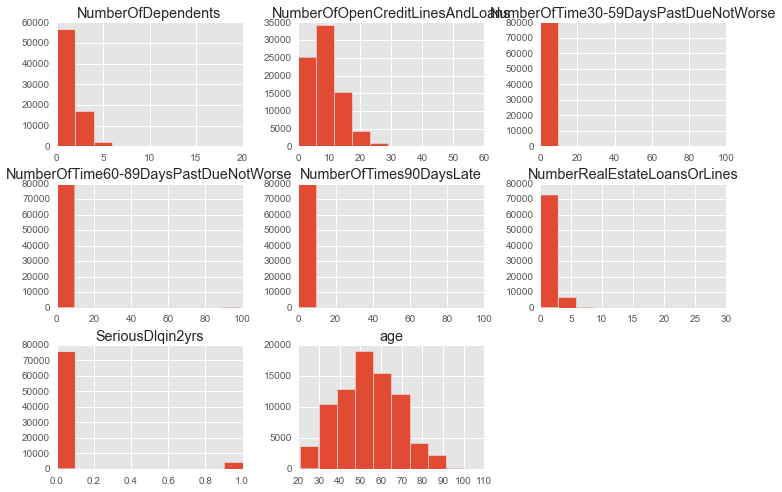

In [36]:
df_simu.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115b409d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116080690>]], dtype=object)

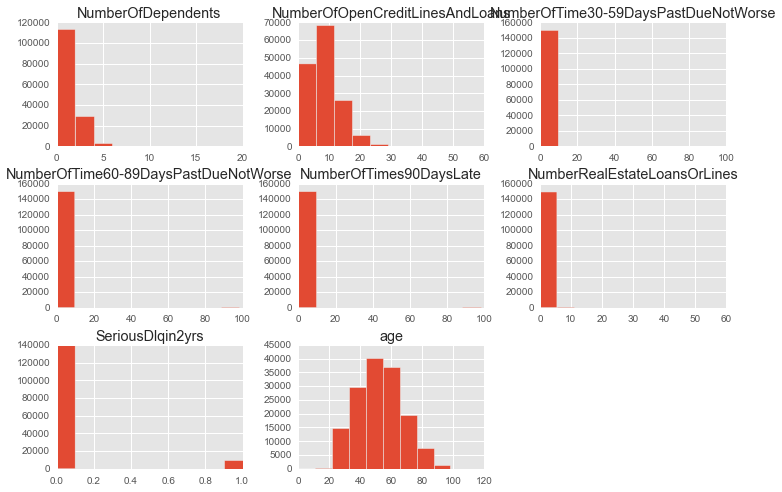

In [37]:
df_train_categoric.hist()

In [38]:
kl_series(df_simu.SeriousDlqin2yrs,df_train_categoric.SeriousDlqin2yrs)

0.00099823640505917327

In [39]:
df_simu.SeriousDlqin2yrs.dropna().value_counts(normalize=True).values

array([ 0.944025,  0.055975])

In [40]:
df_train_categoric.SeriousDlqin2yrs.value_counts(normalize=True).values

array([ 0.93316,  0.06684])

In [41]:
kl(df_train_categoric.SeriousDlqin2yrs.value_counts(normalize=True).values,df_simu.SeriousDlqin2yrs.dropna().value_counts(normalize=True).values)

0.0010549499609156712

In [46]:
for col in df_simu.columns:
    try : 
        print("Kullback-Leibler divergence between both distribution: {}".format(
                kl_series(df_simu.loc[:,col],df_train_categoric.loc[:,col])))
    except Exception as e:
        print('error:{}'.format(e))

Kullback-Leibler divergence between both distribution: 0.000998236405059
Kullback-Leibler divergence between both distribution: 0.0185811071328
error:operands could not be broadcast together with shapes (84,) (86,) 
error:operands could not be broadcast together with shapes (15,) (16,) 
Kullback-Leibler divergence between both distribution: 0.0124991527567
Kullback-Leibler divergence between both distribution: 0.108784312234
error:operands could not be broadcast together with shapes (54,) (58,) 
error:operands could not be broadcast together with shapes (16,) (19,) 
error:operands could not be broadcast together with shapes (23,) (28,) 
Kullback-Leibler divergence between both distribution: 0.00279729429064
error:operands could not be broadcast together with shapes (12,) (13,) 


In [47]:
df_simu.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

In [50]:
len(df_simu['age'].value_counts(normalize=True))

84

In [51]:
len(df_train_categoric['age'].value_counts(normalize=True))

86